In [1]:
import cv2
import random
from PIL import Image
import torchvision.transforms as T

def load_video_frame(video_path, video_part=None, device='cuda'):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if video_part is None:
        frame_index = random.randint(0, total_frames - 1)
    elif video_part < 1:
        frame_index = int(video_part * total_frames)
    else:
        frame_index = min(int(video_part), total_frames - 1)
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        raise ValueError(f"Could not read frame {frame_index} from video")
    
    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame_rgb)
    
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    return transform(img).unsqueeze(0).view(1, 3, 224, 224).to(device)

def load_image(path, device):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224, 224)),   # adjust to what 4M expects
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # adjust if needed
    ])

    return transform(img).unsqueeze(0).view(1, 3, 224, 224).to(device)


In [2]:
import torch
from fourm.demo_4M_sampler import Demo4MSampler, img_from_url
sampler = Demo4MSampler(fm='EPFL-VILAB/4M-21_B')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img1 = load_video_frame("/Users/konradgoldenbaum/Downloads/valid/action_5/clip_1.mp4",0.25, device)
img2 = load_video_frame("/Users/konradgoldenbaum/Downloads/valid/action_5/clip_1.mp4",0.75, device)
img = img_from_url('https://storage.googleapis.com/four_m_site/images/demo_rgb.png') # 1x3x224x224 ImageNet-standardized PyTorch Tensor
preds = sampler({'tok_imagebind@224': torch.stack([img1, img2], dim=0).squeeze()}, seed=403862, target_modalities=['sam_instance','caption'])
sampler.plot_modalities(preds, save_path=None)

/Volumes/KG1TB/Developement/master/master_exp/ml-4m/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Volumes/KG1TB/Developement/master/master_exp/ml-4m/fourm/vq/quantizers/quantize_lucid.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/Volumes/KG1TB/Developement/master/master_exp/ml-4m/fourm/vq/quantizers/quantize_lucid.py:388: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)


xFormers not available
xFormers not available
No module named 'detectron2'
Detectron2 can be used for semseg visualizations. Please install detectron2 to use this feature, or plotting will fall back to matplotlib.
No module named 'pyrender'
Human pose dependencies are not installed, hence poses will not be visualized. To visualize them (optional), you can do the following: 
1) Install via `pip install timm yacs smplx pyrender pyopengl==3.1.4` 
   You may need to follow the pyrender install instructions: https://pyrender.readthedocs.io/en/latest/install/index.html 
2) Download SMPL data from https://smpl.is.tue.mpg.de/. See https://github.com/shubham-goel/4D-Humans/ for an example. 
3) Copy the required SMPL files (smpl_mean_params.npz, SMPL_to_J19.pkl, smpl/SMPL_NEUTRAL.pkl) to fourm/utils/hmr2_utils/data .
Loading 4M models and tokenizers... done!
Generating ['tok_imagebind@224'] -> ['sam_instance', 'caption'] ...


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

/Volumes/KG1TB/Developement/master/master_exp/ml-4m/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Volumes/KG1TB/Developement/master/master_exp/ml-4m/fourm/vq/quantizers/quantize_lucid.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/Volumes/KG1TB/Developement/master/master_exp/ml-4m/fourm/vq/quantizers/quantize_lucid.py:388: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)


xFormers not available
xFormers not available
No module named 'detectron2'
Detectron2 can be used for semseg visualizations. Please install detectron2 to use this feature, or plotting will fall back to matplotlib.
No module named 'pyrender'
Human pose dependencies are not installed, hence poses will not be visualized. To visualize them (optional), you can do the following: 
1) Install via `pip install timm yacs smplx pyrender pyopengl==3.1.4` 
   You may need to follow the pyrender install instructions: https://pyrender.readthedocs.io/en/latest/install/index.html 
2) Download SMPL data from https://smpl.is.tue.mpg.de/. See https://github.com/shubham-goel/4D-Humans/ for an example. 
3) Copy the required SMPL files (smpl_mean_params.npz, SMPL_to_J19.pkl, smpl/SMPL_NEUTRAL.pkl) to fourm/utils/hmr2_utils/data .
Loading 4M models and tokenizers... done!
Generating ['rgb@224'] -> ['sam_instance', 'caption'] ...
Super-resolving [] ...


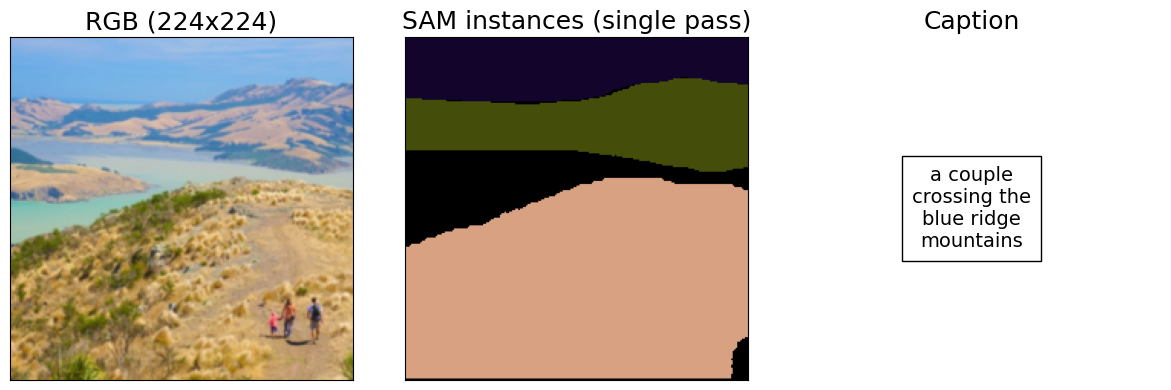

In [1]:
from math import perm
from fourm.demo_4M_sampler import Demo4MSampler, img_from_url
sampler = Demo4MSampler(fm='EPFL-VILAB/4M-21_B')
img = img_from_url('https://storage.googleapis.com/four_m_site/images/demo_rgb.png') # 1x3x224x224 ImageNet-standardized PyTorch Tensor
preds = sampler({'rgb@224': img}, seed=403862, target_modalities=['sam_instance','caption'], permute=False)
sampler.plot_modalities(preds, save_path=None)